###Installation of TensorFlow 2.0

In [28]:
import tensorflow as tf; print(tf.__version__)

2.0.0-alpha0


In [29]:
!pip install tensorflow==2.0.0-alpha0

###Loading the MNIST data

In [30]:
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import utils
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist

(X_Train, Y_Train), (X_Test, Y_Test) = mnist.load_data() 

###Translation of data

In [31]:
X_Train_G33 = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test_G33 = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32') 

###Standardize feature data & Label Onehot-encoding

In [32]:
X_Train_G33_norm = X_Train_G33 / 255  
X_Test_G33_norm = X_Test_G33 /255  
  
Y_TrainOneHot = np_utils.to_categorical(Y_Train)  
Y_TestOneHot = np_utils.to_categorical(Y_Test) 

###Configuration of Neural Network

In [33]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
  
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu'))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Create CN layer 2  
model.add(Conv2D(filters=36,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu'))  
  
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Add Dropout layer  
model.add(Dropout(0.25))

###Construct model

In [34]:
model.add(Flatten())

model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5)) 

model.add(Dense(10, activation='softmax')) 

model.summary()  
print("") 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

###Model training (Back Propagation) 

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=X_Train_G33_norm,  
                          y=Y_TrainOneHot, validation_split=0.2,  
                          epochs=10, batch_size=64, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 - 60s - loss: 0.2962 - accuracy: 0.9068 - val_loss: 0.0663 - val_accuracy: 0.9805
Epoch 2/10
48000/48000 - 57s - loss: 0.0984 - accuracy: 0.9705 - val_loss: 0.0461 - val_accuracy: 0.9868
Epoch 3/10
48000/48000 - 57s - loss: 0.0721 - accuracy: 0.9790 - val_loss: 0.0441 - val_accuracy: 0.9870
Epoch 4/10
48000/48000 - 57s - loss: 0.0616 - accuracy: 0.9815 - val_loss: 0.0441 - val_accuracy: 0.9877
Epoch 5/10
48000/48000 - 57s - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0382 - val_accuracy: 0.9883
Epoch 6/10
48000/48000 - 57s - loss: 0.0444 - accuracy: 0.9865 - val_loss: 0.0326 - val_accuracy: 0.9907
Epoch 7/10
48000/48000 - 57s - loss: 0.0418 - accuracy: 0.9873 - val_loss: 0.0308 - val_accuracy: 0.9911
Epoch 8/10
48000/48000 - 57s - loss: 0.0374 - accuracy: 0.9886 - val_loss: 0.0350 - val_accuracy: 0.9902
Epoch 9/10
48000/48000 - 57s - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.0290 - val_accuracy: 0.9916
Epoch

###Training accuracy vs Evaluation accuracy

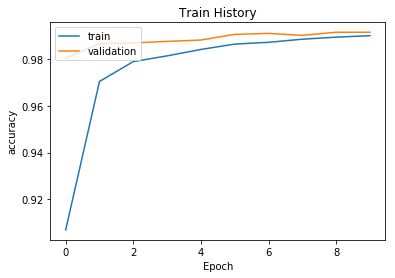

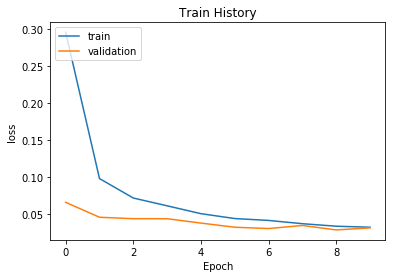

In [36]:
import os

def isDisplayAvl():  
    return 'DISPLAY' in os.environ.keys() 

import matplotlib.pyplot as plt  
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  
    
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train','validation'], loc='upper left')
    plt.show() 
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

###Evaluate model accuracy and Make prediction

####Evaluate model accuracy

In [37]:
scores = model.evaluate(X_Test_G33_norm, Y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

10000/10000 [==============================] - 4s 424us/sample - loss: 0.0220 - accuracy: 0.9927
()
	[Info] Accuracy of testing data = 99.3%


####Make prediction

In [38]:
print("\t[Info] Making prediction of X_Test_G33_norm")  
prediction = model.predict_classes(X_Test_G33_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))

	[Info] Making prediction of X_Test_G33_norm
()
	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 4 4 2]



###Confusion Matrix 

In [39]:
import pandas as pd  
print("\t[Info] Display Confusion Matrix:")  
print("%s\n" % pd.crosstab(Y_Test, prediction, rownames=['label'], colnames=['predict']))

	[Info] Display Confusion Matrix:
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        976     0     0     0    1    0    2     1    0    0
1          0  1134     0     0    0    0    0     1    0    0
2          1     1  1026     1    1    0    0     1    1    0
3          0     0     2  1006    0    1    0     0    1    0
4          0     0     0     0  978    0    0     0    0    4
5          1     0     0     5    0  883    1     1    1    0
6          3     2     0     0    1    3  949     0    0    0
7          0     3     1     1    0    0    0  1018    1    4
8          2     0     1     1    1    2    0     1  964    2
9          1     1     0     0    8    2    0     2    2  993



###Save model

In [41]:
model.save('MNIST_0.7%_Howard_Huang_Group_33_Model.h5')